In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # For ignoring the unwanted warnings shown on the notebook
%matplotlib inline

**Reading the data**

In [2]:
# Importing data
data = pd.read_excel("IPEDS_data.xlsx")
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [3]:
# Getting infromations about the data
print(data.shape)
print(data.info())

(1534, 145)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(116), int64(2), object(27)
memory usage: 1.7+ MB
None


**Cleaning and formatting data**

In [4]:
# Missing values
print(data.isna().sum().sort_values(ascending = False))

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64


Endowment assets (year end) per FTE enrollment (GASB)       66.362451
SAT Writing 25th percentile score                           53.455020
SAT Writing 75th percentile score                           53.455020
Number of first-time undergraduates - foreign countries     40.612777
Percent of first-time undergraduates - out-of-state         40.612777
Number of first-time undergraduates - out-of-state          40.612777
Percent of first-time undergraduates - in-state             40.612777
Number of first-time undergraduates - in-state              40.612777
Number of first-time undergraduates - residence unknown     40.612777
Percent of first-time undergraduates - residence unknown    40.612777
Percent of first-time undergraduates - foreign countries    40.612777
Endowment assets (year end) per FTE enrollment (FASB)       37.418514
SAT Critical Reading 75th percentile score                  23.794003
SAT Critical Reading 25th percentile score                  23.794003
SAT Math 75th percen

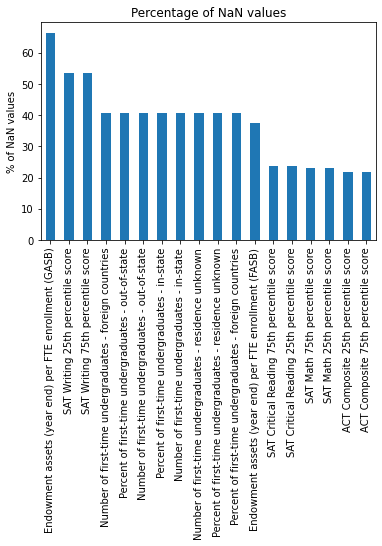

In [5]:
# Finding columns containing 20% or more missing value
na_columns = (data.isna().sum().sort_values(ascending = False) / data.shape[0]) * 100
threshold = 20

na_columns_perc = na_columns[na_columns >= threshold]
print(na_columns_perc)

ax = na_columns_perc.plot.bar(title = "Percentage of NaN values")
ax.set_ylabel("% of NaN values")
plt.show()

In [6]:
# Removing columns with 20% or more NaN values
data_copy = data.copy()
data_copy = data_copy.drop(na_columns_perc.index,axis = 1)

print(data_copy.shape)
data_copy.head()

(1534, 127)


,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0


In [7]:
# Keeping the columns that are related to the goal of the project
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',]

data_copy = data_copy[interesting_columns]
data_copy.shape

(1534, 28)

In [8]:
# Removing rows that contain plethora of NaN values
indexes = data_copy.isna().sum(axis = 1)
indexes_na = indexes[indexes <= 10]
print(indexes_na)

data_copy = data_copy.iloc[indexes_na.index,:]
data_copy.shape

0       0
1       0
2       5
3       0
4       0
       ..
1529    5
1530    1
1531    9
1532    1
1533    8
Length: 1532, dtype: int64


(1532, 28)

In [9]:
# Invalid values
# Identidying numeric values columns
numeric_columns = data_copy.select_dtypes(include = [int,float])
print(numeric_columns.columns)

# Finding if any of these columns contain negative values
print(numeric_columns[numeric_columns < 0].sum())

Index(['year', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Estimated enrollment, total', 'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total'],
      dtype='object')
year                                                              0.0
Applicants total                                      

In [20]:
# Inconsistant values
nb_zeros = data_copy[data_copy == 0].count()
nb_zeros = nb_zeros.reset_index()

ax = sns.barplot(nb_zeros,x = "in",y = 0)
plt.xticks(rotation = 90)
plt.show()

print(nb_zeros)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
print("The total number of zero values in this data is "+ str(nb_zeros[0].sum()))

In [ ]:
# Change the inconsistant values with NaN values
data_copy = data_copy.replace({0:np.NaN})

nb_zeros = data_copy[data_copy == 0].count().sum()
print("The total number of zero values in the new cleaned data is: "+ str(nb_zeros))

**Formatting**

In [ ]:
# Removing spaces
def remove_space(headers,charact):
    new_headers = []
    for header in headers:
        for char in charact:
            if char in header:
                header = header.replace(char,"_")
            header = header
        new_headers.append(header)
    return new_headers

In [ ]:
# Removing special characters
def remove_sp_char(headers,charact):
    new_headers = []
    for header in headers:
        for char in charact:
            if char == "-" or char == '/':
                header = header.replace(char,"_")
            if char in header:
                header = header.replace(char,"")
        new_headers.append(header)
    return new_headers

In [ ]:
headers = remove_space(data_copy.columns,[" - "," "])
headers = remove_sp_char(headers,["'",",",":","-","/"])

In [ ]:
# Lower case all header
new_headers = []
for header in headers:
    header = header.casefold()
    
    if "degrese" in header: # One column name has a typo
        header = header.replace("degrese","degrees")
    
    new_headers.append(header)
    
data_copy.columns = new_headers
data_copy.columns

**Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).**

In [ ]:
data_copy.info()

In [ ]:
print(data_copy["applicants_total"].describe())
data_copy["applicants_total"].plot()
plt.show()

In [ ]:
# Getting the universities with highest and lowest number of applications
print(data_copy.iloc[data_copy["applicants_total"].idxmax(),0])
print(data_copy.iloc[data_copy["applicants_total"].idxmin(),0])

**#1 Do universities with a high number of applications are the preferred ones by students?**

In [ ]:
first_question = data_copy[["applicants_total","admissions_total","enrolled_total"]]
first_question.head()

In [ ]:
fig,ax = plt.subplots(1,3,figsize = (20,5))

sns.histplot(data = first_question,x = "applicants_total",ax = ax[0])
mean_ap = round(first_question["applicants_total"].mean(),1)
median_ap = round(first_question["applicants_total"].median(),1)
ax[0].set_title(f"Histogram of Number of Applicants\nMean: {mean_ap}, Median: {median_ap}")

sns.histplot(data = first_question,x = "admissions_total",ax = ax[1])
mean_ad = round(first_question["admissions_total"].mean(),1)
median_ad = round(first_question["admissions_total"].median(),1)
ax[1].set_title(f"Histogram of Number of Admissions\nMean: {mean_ad}, Median: {median_ad}")

sns.histplot(data = first_question,x = "enrolled_total",ax = ax[2])
mean_en = round(first_question["enrolled_total"].mean(),1)
median_en = round(first_question["enrolled_total"].median(),1)
ax[2].set_title(f"Histogram of Number of Enrolled\nMean: {mean_en}, Median: {median_en}")

plt.show()

In [ ]:
first_question["enrollements_rate"] = first_question["enrolled_total"] / first_question["admissions_total"]
first_question.head()

In [ ]:
sns.scatterplot(data = first_question,x = "applicants_total",y = "enrollements_rate")
plt.title("Applications vs Enrollment Rate")
plt.xlabel("Number of Applicants")
plt.ylabel("Enrollment Rate %")
plt.show()

In [ ]:
first_question[["applicants_total","enrollements_rate"]].corr()

**we can say that a high number of applications does not mean that a university is preferred among students.**

**#2  Do students prefer universities that have a high rate of admission?**

In [ ]:
second_question = data_copy[["applicants_total","admissions_total","enrolled_total"]]
second_question.head()

In [ ]:
second_question["admissions_rate"] = second_question["admissions_total"] / second_question["applicants_total"]

second_question["enrollements_rate"] = second_question["enrolled_total"] / second_question["admissions_total"]

second_question.head()

In [ ]:
sns.scatterplot(data = second_question,x = "admissions_rate",y = "enrollements_rate")

plt.title("Acceptance Rate vs Enrollment Rate")
plt.xlabel("Acceptance Rate %")
plt.ylabel("Enrollment Rate %")

plt.show()

In [ ]:
second_question[["admissions_rate","enrollements_rate"]].corr()

**students do not necessarily prefer a university because of its high acceptance rate.**

**#3 Do students prefer public or private universities?**

In [ ]:
third_question = data_copy[["control_of_institution","applicants_total","enrolled_total"]]
third_question.head()

In [ ]:
np.unique(third_question["control_of_institution"])

In [ ]:
third_question["enrollments_rate"] = third_question["applicants_total"] / third_question["enrolled_total"]

sns.histplot(data = third_question,x = "enrollments_rate",hue = "control_of_institution")
plt.show()

**we can conclude that, in fact, there is a students’ preference for public universities.**

**#4 Do students prefer a university because of its low tuition and fees?**

In [ ]:
forth_question = data_copy[["applicants_total","enrolled_total","tuition_and_fees_2013_14"]]
forth_question.head()

In [ ]:
forth_question["enrollments_rate"] = forth_question["enrolled_total"] / forth_question["applicants_total"]
forth_question.head()

In [ ]:
sns.scatterplot(data = forth_question,x = "tuition_and_fees_2013_14",y = "enrollments_rate")
plt.show()

In [ ]:
forth_question_prefered = forth_question[forth_question["enrollments_rate"] > 0.5]
forth_question_prefered.head()

In [ ]:
bins = [0,20000,40000,50000]
labels = ["Low","Medium","High"]
forth_question_prefered["tuition_and_fees_category"] = pd.cut(forth_question_prefered["tuition_and_fees_2013_14"],bins = bins,labels = labels)
forth_question_prefered.head()

In [ ]:
forth_question_prefered.groupby("tuition_and_fees_category")[["tuition_and_fees_2013_14","enrollments_rate"]].agg([np.mean,np.median])

In [ ]:
sns.histplot(data = forth_question_prefered,x = "tuition_and_fees_category")

plt.title("Histogram of Categories of Tuition and Fees\nAmong Prefered Universities")
plt.xlabel("Tuition and Fees Categories")
plt.show()

**We can see that the more the fees the less the admission yield, So students prefer universties with low fees**

**#5 Do students prefer a university for its low cost of on-campus living?**

In [ ]:
interest = ["applicants_total","enrolled_total","control_of_institution","total_price_for_in_state_students_living_on_campus_2013_14","total_price_for_out_of_state_students_living_on_campus_2013_14"]

fifth_question = data_copy[interest]
fifth_question["enrollments_rate"] = fifth_question["enrolled_total"] / fifth_question["applicants_total"]

fifth_question.head()

In [ ]:
sns.scatterplot(data = fifth_question,x = "total_price_for_in_state_students_living_on_campus_2013_14",y = "enrollments_rate",hue = "control_of_institution")

plt.title("Cost of On Campus Living for In State Students\nVS Enrollments Rate")
plt.xlabel("Cost of On Campus Living for In State Students")
plt.ylabel("Enrollments Rate %")
plt.show()

In [ ]:
fifth_question[["enrollments_rate","total_price_for_in_state_students_living_on_campus_2013_14"]].corr()

In [ ]:
sns.scatterplot(data = fifth_question,x = "total_price_for_out_of_state_students_living_on_campus_2013_14",y = "enrollments_rate",hue = "control_of_institution")

plt.title("Cost of On Campus Living for Out Of State Students\nVS Enrollments Rate")
plt.xlabel("Cost of On Campus Living for Out Of State Students")
plt.ylabel("Enrollments Rate %")
plt.show()

In [ ]:
fifth_question[["enrollments_rate","total_price_for_out_of_state_students_living_on_campus_2013_14"]].corr()

**In general, the average cost offered by public universities is lower than the cost offered by private universities.**

**students, in general, prefer universities with affordable costs of on-campus living.**

**#6 Do students prefer universities from highly populated states?**

In [ ]:
interest = ["applicants_total","enrolled_total","control_of_institution","state_abbreviation"]

sixth_question = data_copy[interest]
sixth_question["enrollments_rate"] = sixth_question["enrolled_total"] / sixth_question["applicants_total"]


sixth_question.head()

In [ ]:
popular_states = ['California', 'Florida', 'Texas', 'New York', 'Pennsylvania']
sixth_question["popular_state"] = sixth_question["state_abbreviation"].apply(lambda x: True if x in popular_states else False)

sixth_question.head()

In [ ]:
sns.boxplot(data = sixth_question,x = "popular_state",y = "enrollments_rate",hue = "control_of_institution")

plt.title("Popular States VS Enrollments Rate")
plt.xlabel("Popular State")
plt.ylabel("Enrollments Rate %")
plt.show()

**We can see that the less populated regions the more the admission rate**

**7# Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?**

In [ ]:
degree_offers = ['highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice']

seventh_question = data_copy[degree_offers + ["applicants_total"] + ["enrolled_total"]]
seventh_question["enrollments_rate"] = seventh_question["enrolled_total"] / seventh_question["applicants_total"]

seventh_question.head()

In [ ]:
percentages = seventh_question["highest_degree_offered"].value_counts(normalize = True) * 100
percentages

In [ ]:
plt.pie(percentages.values,labels = percentages.index, autopct='%1.1f%%', startangle=90)

plt.title("Highest Degree Offered")
plt.show()

In [ ]:
sns.stripplot(data = seventh_question,x = "enrollments_rate",y = "highest_degree_offered")

plt.title("Highest Degree Offered VS Enrollments Rate")
plt.xlabel("Enrollments Rate %")
plt.ylabel("Highest Degree Offered")
plt.show()

**So there alot of collage that deosn't have a higher degree and still have a high rate of admission**

**Inferences and Conclusions.**

* A high number of applications does not imply that a university is preferred among students.

* Students do not necessarily prefer a university because of its high acceptance rate or, in other words, the students’ preference is not based on how easy it is for them to be admitted to a university.

* There is a strong students’ preference for public universities.

* Two of the main reasons why public universities are preferred by students are: first, on average public universities present more affordable tuition and fees than private universities; second, public universities have more affordable on-campus living costs.

* Students, in general, prefer universities with affordable costs of on-campus living.

* When students look for a university to study for a Bachelor’s degree, they do not frequently choose the university thinking about a future possibility of pursuing a higher degree at the same university